In [1]:
# https://nbviewer.org/github/dcajasn/Riskfolio-Lib/blob/master/examples/Tutorial%2034%20-%20Comparing%20Covariance%20Estimators%20Methods.ipynb

In [2]:
#utorial 34: Comparing Covariance Estimators Methods
#1. Downloading the data:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2023-04-05'
end = '2023-07-30'

# Tickers of assets
assets = ['NVDA',"WMT","AMZN","LLY","NFLX"]
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  5 of 5 completed


In [3]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AMZN,LLY,NFLX,NVDA,WMT
Date,,,,,
2023-04-06,0.9496%,1.6702%,-0.8821%,0.5803%,0.7550%
2023-04-10,0.1078%,-0.3503%,-0.1002%,2.0047%,-0.1923%
2023-04-11,-2.2022%,-0.8065%,-0.2301%,-1.4866%,-0.2923%
2023-04-12,-2.0917%,1.3762%,-2.1229%,-2.4808%,-0.4864%
2023-04-13,4.6714%,1.6529%,4.5796%,-0.1208%,0.1005%


In [4]:
#2. Estimating Mean Variance Portfolios
#2.1 Calculating the portfolio that minimizes Variance.
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_covs = ['hist', 'ledoit', 'oas', 'shrunk', 'gl', 'ewma1',
               'ewma2','jlogo', 'fixed', 'spectral', 'shrink',
               'gerber1', 'gerber2']

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_s = pd.DataFrame([])

for i in method_covs:
    port.assets_stats(method_mu=method_mu, method_cov=i, d=0.94)
    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = method_covs


W Matrix too small 

You must convert self.cov to a positive definite matrix


In [5]:
display(w_s.style.format("{:.2%}").background_gradient(cmap='YlGn'))

,hist,ledoit,oas,shrunk,gl,ewma1,ewma2,jlogo,fixed,spectral,shrink,gerber1,gerber2
AMZN,1.92%,18.82%,9.34%,9.01%,6.98%,11.23%,11.43%,1.79%,1.86%,0.00%,0.00%,3.52%,0.31%
LLY,12.28%,24.20%,21.43%,20.95%,17.08%,16.90%,15.92%,12.68%,13.18%,0.00%,8.98%,13.94%,12.82%
NFLX,0.00%,16.65%,0.77%,0.22%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
NVDA,3.11%,11.45%,4.54%,4.45%,2.14%,2.76%,2.95%,3.37%,1.08%,0.00%,0.20%,0.94%,0.28%
WMT,82.69%,28.88%,63.93%,65.37%,73.79%,69.11%,69.70%,82.17%,83.88%,100.00%,90.82%,81.61%,86.59%


<Axes: >

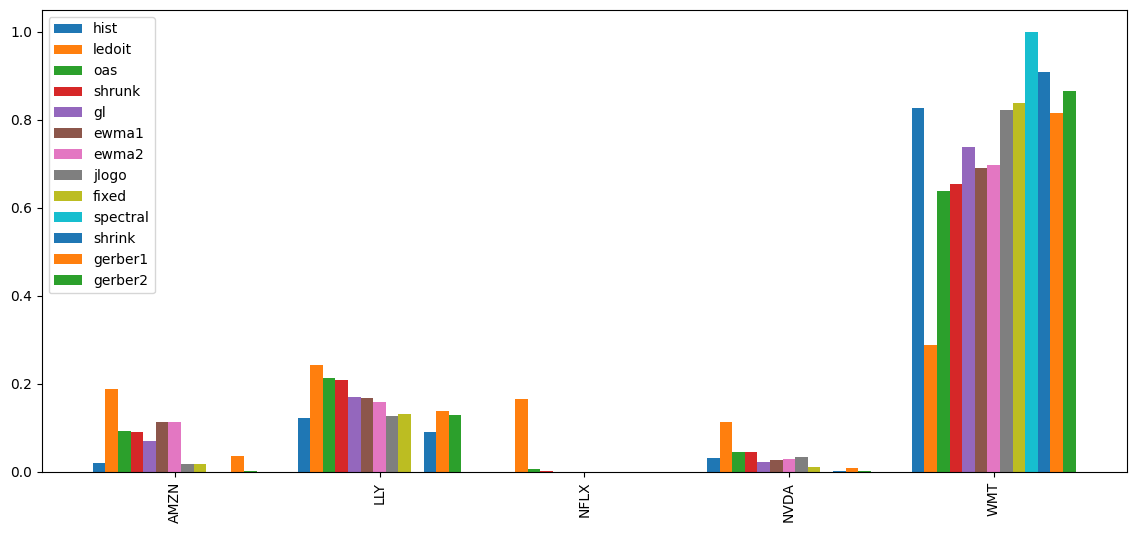

In [6]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio
fig, ax = plt.subplots(figsize=(14,6))

w_s.plot.bar(ax=ax, width=0.8)

In [7]:
#2.2 Calculating the portfolio that maximizes Sharpe ratio.
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe

w_s = pd.DataFrame([])

for i in method_covs:
    port.assets_stats(method_mu=method_mu, method_cov=i, d=0.94)
    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = method_covs

W Matrix too small 

You must convert self.cov to a positive definite matrix


In [8]:
display(w_s.style.format("{:.2%}").background_gradient(cmap='YlGn'))

,hist,ledoit,oas,shrunk,gl,ewma1,ewma2,jlogo,fixed,spectral,shrink,gerber1,gerber2
AMZN,21.72%,23.03%,22.83%,22.75%,20.67%,24.80%,24.55%,20.72%,23.61%,0.00%,23.24%,21.85%,21.02%
LLY,47.72%,25.75%,42.84%,43.22%,43.00%,44.34%,43.53%,48.84%,44.87%,100.00%,51.69%,48.38%,51.92%
NFLX,14.29%,20.69%,16.17%,16.02%,13.83%,16.20%,17.09%,13.53%,15.40%,0.00%,6.40%,16.63%,14.42%
NVDA,16.27%,28.76%,18.17%,18.00%,13.98%,14.67%,14.83%,16.91%,16.12%,0.00%,18.67%,13.14%,12.64%
WMT,0.00%,1.77%,0.00%,0.00%,8.52%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

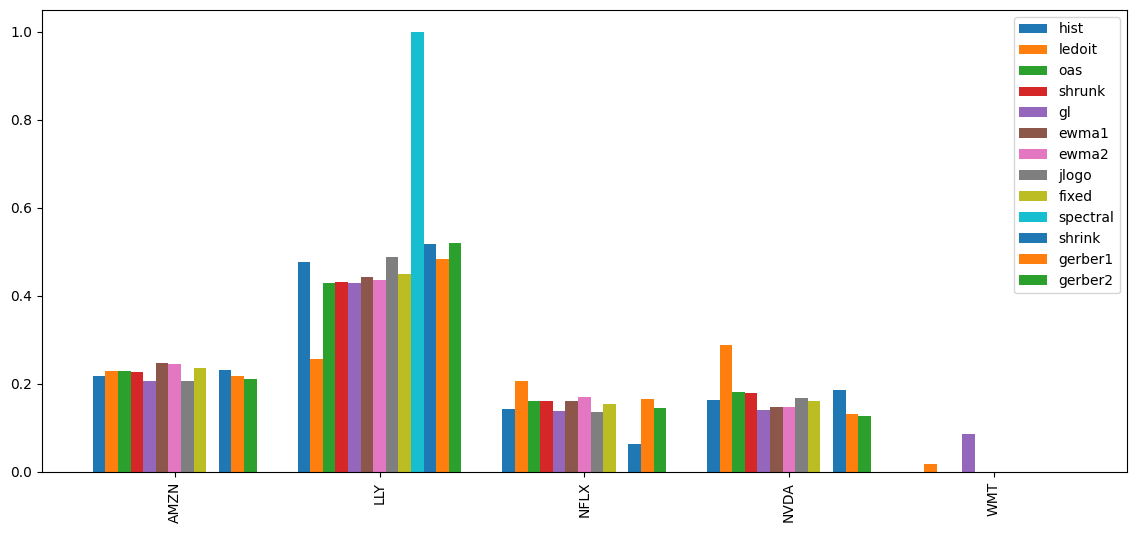

In [9]:
# Plotting a comparison of assets weights for each portfolio
ax, fig = plt.subplots(figsize=(14,6))

w_s.plot.bar(ax=fig, width=0.8)

In [10]:
w_s

,hist,ledoit,oas,shrunk,gl,ewma1,ewma2,jlogo,fixed,spectral,shrink,gerber1,gerber2
AMZN,21.7153%,23.0333%,22.8285%,22.7525%,20.6654%,24.7962%,24.5532%,20.7152%,23.6112%,0.0000%,23.2407%,21.8482%,21.0241%
LLY,47.7212%,25.7484%,42.8368%,43.2232%,43.0048%,44.3411%,43.5267%,48.8439%,44.8721%,100.0000%,51.6899%,48.3797%,51.9174%
NFLX,14.2911%,20.6908%,16.1687%,16.0213%,13.8279%,16.1970%,17.0921%,13.5334%,15.3972%,0.0000%,6.4016%,16.6302%,14.4208%
NVDA,16.2724%,28.7567%,18.1660%,18.0031%,13.9790%,14.6657%,14.8280%,16.9074%,16.1195%,0.0000%,18.6678%,13.1419%,12.6377%
WMT,0.0000%,1.7708%,0.0000%,0.0000%,8.5229%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0001%


In [11]:
w

,weights
AMZN,21.0241%
LLY,51.9174%
NFLX,14.4208%
NVDA,12.6377%
WMT,0.0001%
